In [1]:
import pickle
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats
import os

#https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n - 1)
    return m, m - h, m + h

def set_dict_entry(dictionary, keys, value):
    for key in keys[:-1]:
        dictionary = dictionary.setdefault(key, {})
    dictionary[keys[-1]] = value
    
def dict_iterator(dictionary, keys=None):
    if keys is None:
        keys = []
    for key, value in dictionary.items():
        new_keys = keys + [key]
        if isinstance(value, dict):
            for pair in dict_iterator(value, keys=new_keys):
                yield pair
        else:
            yield [new_keys, value]
            
def get_CI(dictionary):
    to_return = {}
    for val in dict_iterator(dictionary):
        utilities = val[1]
        set_dict_entry(to_return, val[0], mean_confidence_interval(utilities))
    return to_return

In [26]:
dir = 'Results/'
results = {}
for file in os.scandir(dir):
    if file.name.endswith('.p'):
        tokens = file.name[:-2].split('_')
        with open(os.path.join(dir, file.name), 'rb') as input_file:
            value = pickle.load(input_file)
        set_dict_entry(results, [tokens[0], tokens[-1]], value)
print(results)

CI_dict = get_CI(results)

print(CI_dict)              

{'leap': {'1000': [0.03912687301635742, 0.040079593658447266, 0.039806365966796875, 0.040686845779418945, 0.04267621040344238, 0.04044628143310547, 0.040717124938964844, 0.03964042663574219, 0.040079355239868164, 0.031192541122436523, 0.030085325241088867, 0.03059220314025879, 0.02963423728942871, 0.03510904312133789, 0.03118753433227539, 0.030390024185180664, 0.030442237854003906, 0.030942201614379883, 0.02970743179321289, 0.030251264572143555, 0.029967546463012695, 0.03097248077392578, 0.029249906539916992, 0.02922677993774414, 0.03086090087890625, 0.030450820922851562, 0.030759572982788086, 0.03103947639465332, 0.02985835075378418, 0.030986309051513672, 0.03106856346130371, 0.03134441375732422, 0.03014659881591797, 0.031017541885375977, 0.030901670455932617, 0.030706405639648438, 0.029492855072021484, 0.03178834915161133, 0.029356002807617188, 0.03122997283935547, 0.03055858612060547, 0.030114412307739258, 0.030791282653808594, 0.029201984405517578, 0.029918670654296875, 0.030445337

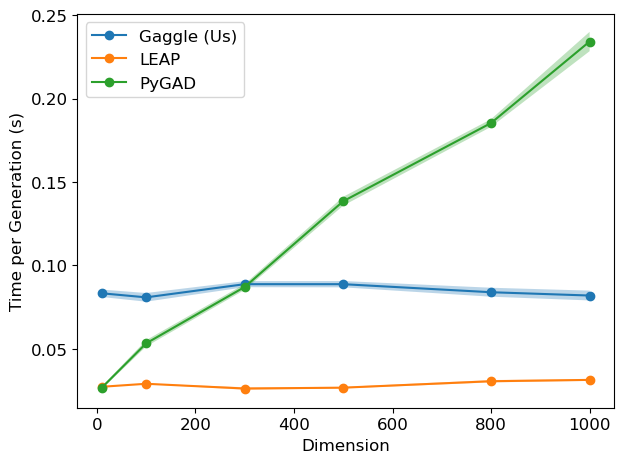

<Figure size 640x480 with 0 Axes>

In [27]:
dimesions = [10, 100, 300, 500, 800, 1000]
plt.rcParams.update({'font.size': 12})

nice_names = {'gaggle':'Gaggle (Us)', 'leap': 'LEAP', 'pygad': 'PyGAD'}
for algorithm in nice_names:
    result = CI_dict[algorithm]
    values = [result[str(x)][0] for x in dimesions]
    lower = [result[str(x)][1] for x in dimesions]
    upper = [result[str(x)][2] for x in dimesions]
    plt.plot(dimesions, values, label=nice_names[algorithm], marker='o')
    plt.fill_between(dimesions, lower, upper, alpha=0.3)
        
# plt.title("{} Dataset".format(dataset))
plt.xlabel("Dimension")
plt.ylabel("Time per Generation (s)")
plt.tight_layout()
plt.legend()
plt.plot()
plt.savefig('Results/rast_plot.png', bbox_inches='tight')
plt.show()
plt.clf()